# 국민체력 측정 현황 

2019년 9월, 10월, 11월 자료를 합해 분석했다. 해당 근거는 [기사](http://m.hani.co.kr/arti/specialsection/esc_section/910946.html#cb)에 근거한 것으로 3개월마다 측정하는 것이 좋다는 기사를 참고했다.       
[seaborn](https://teddylee777.github.io/visualization/seaborn-tutorial-1)참고

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
fit_9 = pd.read_csv('data/KS_NFA_FTNESS_MESURE_STTUS_201909.csv')
fit_10 = pd.read_csv('data/KS_NFA_FTNESS_MESURE_STTUS_201910.csv')
fit_11 = pd.read_csv('data/국민체력측정_현황_201911.csv')

In [4]:
print("2019년 9월 데이터 shape : {}".format(fit_9.shape))
fit_9.head()

2019년 9월 데이터 shape : (28594, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,금천,성인,일반,25,관리자,참가상,20190902,F
1,1,오산,노인,출장,87,관리자,참가상,20190902,F
2,1,오산,노인,출장,88,관리자,동상,20190902,F
3,1,오산,노인,출장,88,관리자,참가상,20190902,F
4,7,영동,노인,일반,65,관리자,금상,20190902,F


In [5]:
print("2019년 10월 데이터 shape : {}".format(fit_10.shape))
fit_10.head()

2019년 10월 데이터 shape : (28081, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,군산,청소년,출장,15,관리자,동상,20191017,M
1,2,포항,성인,출장,29,관리자,참가상,20191027,F
2,1,포항,성인,출장,50,관리자,참가상,20191027,F
3,2,서구(대전),성인,일반,37,관리자,금상,20191027,F
4,2,서구(대전),성인,일반,40,관리자,은상,20191027,M


In [6]:
print("2019년 11월 데이터 shape : {}".format(fit_11.shape))
fit_11.head()

2019년 11월 데이터 shape : (29941, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,2,영동,성인,NaN,19,NaN,참가상,20191114,F
1,4,사상,노인,NaN,72,NaN,참가상,20191114,F
2,4,남구(부산),청소년,NaN,18,NaN,동상,20191114,M
3,25,곡성,노인,NaN,70,NaN,금상,20191120,F
4,2,동작,노인,NaN,65,NaN,참가상,20191120,F


# 데이터 프레임 합치기

In [7]:
df = pd.concat([fit_9,fit_10,fit_11])
print("합친 데이터 프레임 shape :{}".format(df.shape))
df.head()

합친 데이터 프레임 shape :(86616, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,금천,성인,일반,25,관리자,참가상,20190902,F
1,1,오산,노인,출장,87,관리자,참가상,20190902,F
2,1,오산,노인,출장,88,관리자,동상,20190902,F
3,1,오산,노인,출장,88,관리자,참가상,20190902,F
4,7,영동,노인,일반,65,관리자,금상,20190902,F


In [8]:
# 인덱스 재배치
df = df.reset_index(drop=True)
df.index.is_unique

True

In [9]:
df.tail()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
86611,3,목포,노인,출장,75,관리자,금상,20191129,F
86612,6,순천,성인,일반,22,인바디,참가상,20191129,F
86613,6,연수,노인,출장,75,관리자,은상,20191126,M
86614,1,KSPO아산(출장),청소년,출장,14,관리자,참가상,20191129,M
86615,1,성동,노인,출장,91,관리자,은상,20191129,F


## age 새로운 항목 만들기 

In [10]:
df.loc[df['AGE_GBN']=='청소년','age'] = 10
df.loc[(df['TEST_AGE'] >= 20) & (df['TEST_AGE'] <=30),'age'] = 20
df.loc[(df['TEST_AGE'] >= 30) & (df['TEST_AGE'] <=40),'age'] = 30
df.loc[(df['TEST_AGE'] >= 40) & (df['TEST_AGE'] <=50),'age'] = 40
df.loc[(df['TEST_AGE'] >= 50) & (df['TEST_AGE'] <=60),'age'] = 50
df.loc[(df['TEST_AGE'] >= 60) ,'age'] = 60

# 출장, 센터 데이터 분리하기

In [11]:
fit_on =  df[df['TEST_GBN']!='출장']
fit_off = df[df['TEST_GBN']=='출장']

print('센터에서 측정한 개수 : {} \n출장에서 측정한 갯수 : {}'.format(fit_on.shape[0],fit_off.shape[0]))

센터에서 측정한 개수 : 29918 
출장에서 측정한 갯수 : 56698


# 데이터 분석
## 나이

In [12]:
# 나이 분류하는 함수만들기 

def age_classification(df) :
    
    test = pd.DataFrame(columns=['number'],index=['Teenager','20s','30s','40s','50s','old'])
    
    # 청소년
    print("청소년 수는 {} 입니다".format(len(df[df['AGE_GBN']=='청소년'] )))
    test.loc['Teenager'] = len(df[df['AGE_GBN']=='청소년'] )
    
    # 20대
    print("20대 수는 {} 입니다".format(len(df[(df['TEST_AGE'] >= 20) & (df['TEST_AGE'] <30)] )))
    test.loc['20s'] = len(df[(df['TEST_AGE'] >= 20) & (df['TEST_AGE'] <30)] )
    
    # 30대
    print("30대 수는 {} 입니다".format(len(df[(df['TEST_AGE'] >= 30) & (df['TEST_AGE'] <40)] )))
    test.loc['30s'] = len(df[(df['TEST_AGE'] >= 30) & (df['TEST_AGE'] <40)] )
    
    # 40대 
    print("40대 수는 {} 입니다".format(len(df[(df['TEST_AGE'] >= 40) & (df['TEST_AGE'] <50)] )))
    test.loc['40s'] =len(df[(df['TEST_AGE'] >= 40) & (df['TEST_AGE'] <50)] )
    
    # 50대 
    print("50대 수는 {} 입니다".format(len(df[(df['TEST_AGE'] >= 50) & (df['TEST_AGE'] <60)] )))
    test.loc['50s'] = len(df[(df['TEST_AGE'] >= 50) & (df['TEST_AGE'] <60)] )
    
    # 노인
    print("60대 이상(노인) 수는 {} 입니다".format(len(df[(df['TEST_AGE'] >= 60)] )))
    test.loc['old'] = len(df[(df['TEST_AGE'] >= 60)])
    
    
    return test

In [13]:
print("센터에서 측정한 데이터 입니다 ")
test_on= age_classification(fit_on)

센터에서 측정한 데이터 입니다 
청소년 수는 2998 입니다
20대 수는 10869 입니다
30대 수는 2333 입니다
40대 수는 2364 입니다
50대 수는 2991 입니다
60대 이상(노인) 수는 6546 입니다


<BarContainer object of 6 artists>

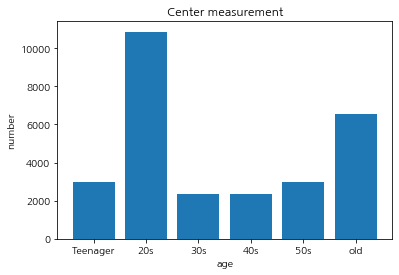

In [14]:
plt.title('Center measurement')
plt.xlabel('age')
plt.ylabel('number')
plt.bar(test_on.index, test_on['number'])

In [15]:
print("출장에서 측정한 데이터 입니다 ")
test_off= age_classification(fit_off)

센터에서 측정한 데이터 입니다 
청소년 수는 25341 입니다
20대 수는 7288 입니다
30대 수는 2484 입니다
40대 수는 2366 입니다
50대 수는 2852 입니다
60대 이상(노인) 수는 12964 입니다


<BarContainer object of 6 artists>

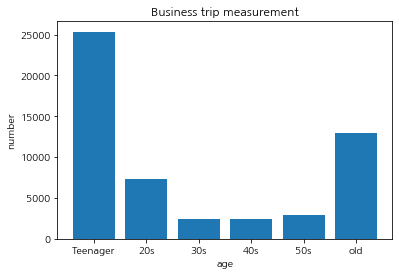

In [16]:
plt.title('Business trip measurement')
plt.xlabel('age')
plt.ylabel('number')
plt.bar(test_off.index, test_off['number'])

**같이 비교하기**

In [17]:
test_on.rename(columns={'number' :'center'},inplace=True)
test_off.rename(columns={'number' :'trip'},inplace=True)

In [18]:
test = pd.concat([test_on, test_off], axis=1)
test 

,center,trip
Teenager,2998,25341
20s,10869,7288
30s,2333,2484
40s,2364,2366
50s,2991,2852
old,6546,12964


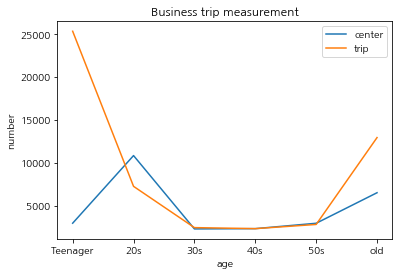

In [19]:
plt.title('Business trip measurement')
plt.xlabel('age')
plt.ylabel('number')
plt.plot(test['center'], label = 'center')
plt.plot(test['trip'], label = 'trip')
plt.legend()
plt.show()

## 성별

In [20]:
age_test = pd.DataFrame(index=['Man','Female'], columns=['center','trip']) 

In [21]:
age_test.loc['Man','center'] = len(fit_on[fit_on['TEST_SEX']=='M'])
age_test.loc['Female','center'] = len(fit_on[fit_on['TEST_SEX']=='F'])
age_test.loc['Man','trip'] = len(fit_off[fit_off['TEST_SEX']=='M'])
age_test.loc['Female','trip'] = len(fit_off[fit_off['TEST_SEX']=='F'])

age_test

,center,trip
Man,12843,30442
Female,17075,26256


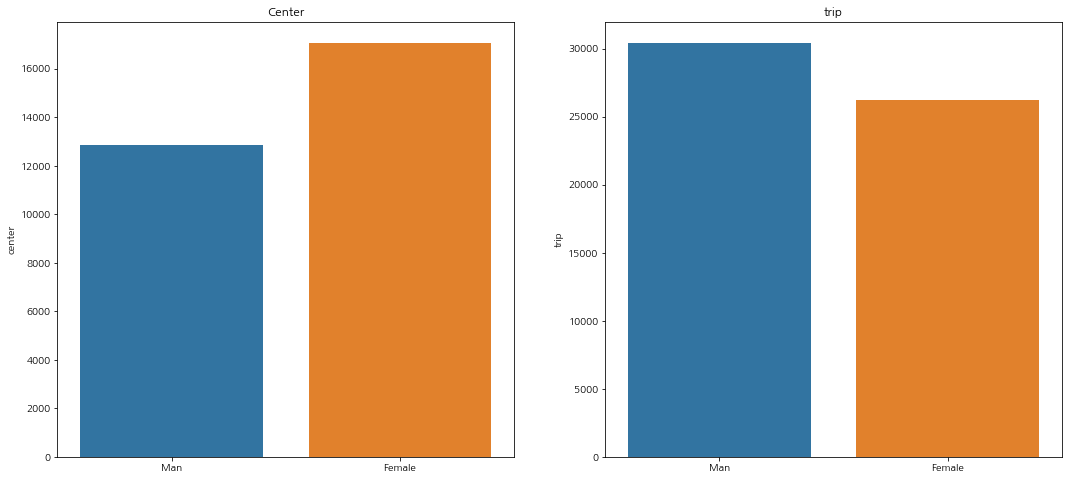

In [22]:
f, ax = plt.subplots(1,2, figsize = (18,8))
ax[0].set_title('Center')
sns.barplot(data=age_test,
           x = age_test.index,
           y = age_test['center'],
            ax = ax[0]
        
          )
ax[1].set_title('trip')
sns.barplot(data=age_test,
           x = age_test.index,
           y = age_test['trip'],
            ax = ax[1]
          )

## 다중 그래프 

In [23]:
fit_on.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,age
0,1,금천,성인,일반,25,관리자,참가상,20190902,F,20.0
4,7,영동,노인,일반,65,관리자,금상,20190902,F,60.0
6,1,광산,성인,일반,56,관리자,참가상,20190902,F,50.0
7,1,금천,성인,일반,36,관리자,참가상,20190902,F,30.0
8,2,동작,노인,일반,76,관리자,동상,20190902,M,60.0


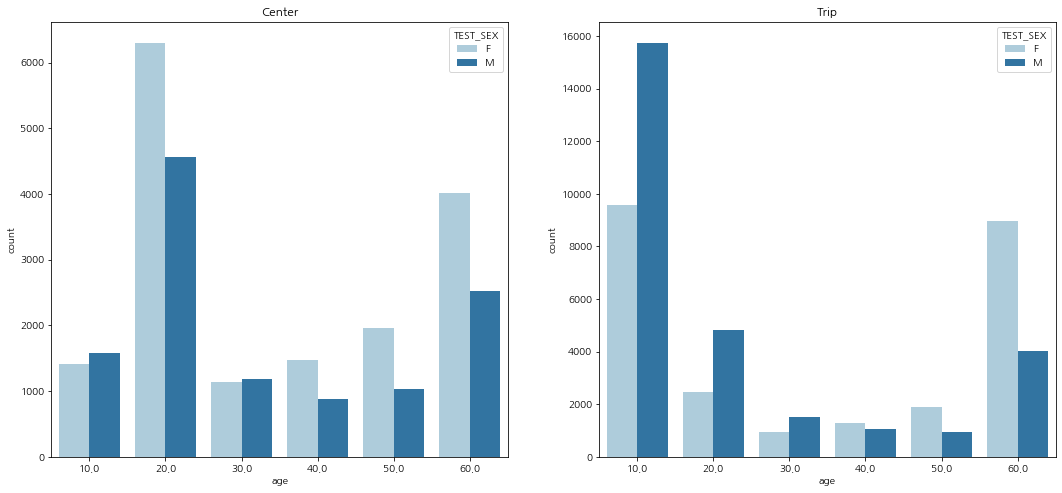

In [24]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.countplot(x='age',hue = 'TEST_SEX', palette='Paired', data = fit_on, ax = ax[0]).set_title('Center')
sns.countplot(x='age',hue = 'TEST_SEX', palette='Paired', data = fit_off, ax = ax[1]).set_title('Trip')
plt.show()

## CERT_GBN	, 상 수여

In [25]:
fit_on['CERT_GBN'].unique()

array(['참가상', '금상', '동상', '은상'], dtype=object)

In [26]:
fit_off['CERT_GBN'].unique()

array(['참가상', '동상', '은상', '금상'], dtype=object)

Text(0.5, 1.0, 'Trip')

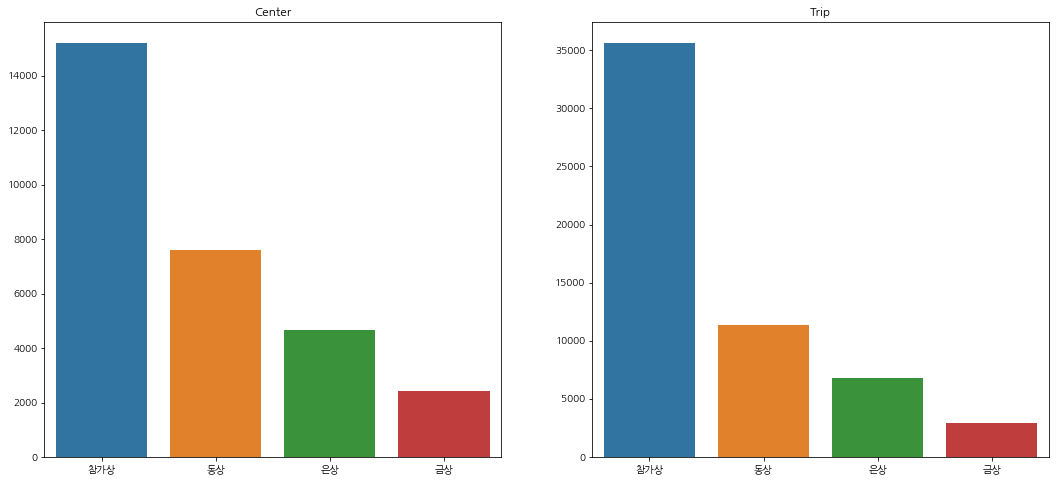

In [27]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.barplot(x = fit_on['CERT_GBN'].value_counts().keys().tolist(), y = fit_on['CERT_GBN'].value_counts().tolist(),ax = ax[0]).set_title('Center')
sns.barplot(x = fit_off['CERT_GBN'].value_counts().keys().tolist(), y = fit_off['CERT_GBN'].value_counts().tolist(),ax = ax[1]).set_title('Trip')

In [28]:
fit_on['CERT_GBN'].value_counts()

참가상    15208
동상      7607
은상      4673
금상      2430
Name: CERT_GBN, dtype: int64

In [29]:
fit_off['CERT_GBN'].value_counts()

참가상    35637
동상     11342
은상      6808
금상      2911
Name: CERT_GBN, dtype: int64

### 금상을 탐구해보자

Text(0.5, 1.0, 'Center')

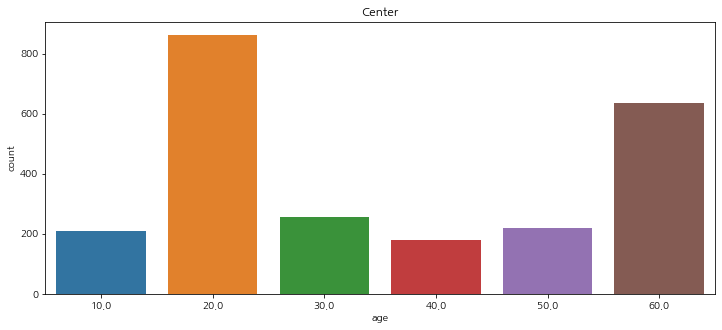

In [46]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'age',data=fit_on.loc[fit_on['CERT_GBN']=='금상',['age','TEST_SEX']]).set_title('Center')

Text(0.5, 1.0, '출장')

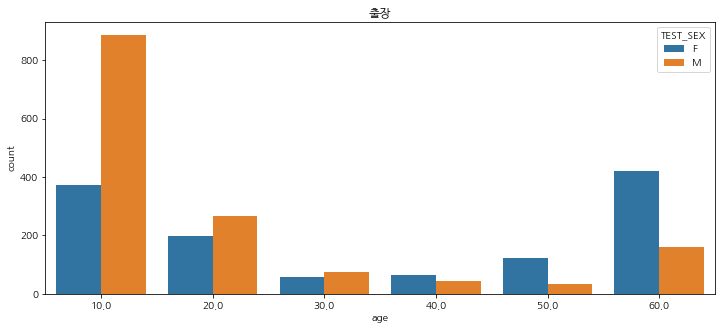

In [31]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'age', hue='TEST_SEX',data=fit_off.loc[fit_off['CERT_GBN']=='금상',['age','TEST_SEX']]).set_title('출장')

## 지역

In [95]:
len(fit_off['CENTER_NM'].unique()) / len(fit_on['CENTER_NM'].unique()) 

1.0

In [32]:
fit_off['CENTER_NM'].value_counts()

KSPO송파(출장)    2869
영동            2212
김천            2028
KSPO아산(출장)    1996
스포원(금정)       1993
북구(광주)        1903
광산            1895
서초            1793
군산            1781
안동            1776
창원            1719
전주            1711
사하            1697
충주            1626
춘천            1604
달서            1600
목포            1420
원주            1379
서구(대전)        1235
제주            1183
사천            1157
강릉            1140
금천            1100
연수            1005
북구(부산)         981
동구(광주)         948
세종             947
성동             931
남구(울산)         926
곡성             897
동작             846
오산             835
남원             817
증평             779
노원             659
남구(부산)         635
KSPO송파         621
마포             591
시흥             589
구미             582
나주             570
사상             550
의정부            433
KSPO아산         424
화성             389
천안             335
삼척             312
부천             290
순천             288
성남             243
청주             183
계룡             152
포항          

In [34]:
fit_on['CENTER_NM'].value_counts()

순천            1659
오산            1217
청주            1117
성동            1091
남구(부산)        1039
전주             925
달서             925
서초             904
의정부            902
화성             901
마포             869
제주             788
남원             765
북구(부산)         721
부천             687
KSPO송파         681
원주             662
서구(대전)         641
스포원(금정)        623
구미             614
금천             603
사하             597
곡성             582
광산             582
동작             553
북구(광주)         547
남구(울산)         544
동구(광주)         538
사상             518
춘천             504
군산             488
포항             482
창원             474
증평             467
삼척             440
영동             426
안동             385
김천             349
연수             335
노원             323
나주             292
성남             287
사천             245
KSPO아산         237
세종             236
강릉             233
목포             230
천안             197
KSPO송파(출장)     150
시흥             136
계룡              90
충주              72
KSPO아산(출장)  

### 서울만 뽑아보기

In [72]:
seoul_city = ['성동','서초','의정부','마포','동작','금천','노원','화성','오산','부천','성남']
len(seoul_city)

11

In [84]:
seoul_on = fit_on[fit_on.CENTER_NM.apply(lambda sentence : any(word in sentence for word in seoul_city))]

In [85]:
seoul_on.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,age
0,1,금천,성인,일반,25,관리자,참가상,20190902,F,20.0
7,1,금천,성인,일반,36,관리자,참가상,20190902,F,30.0
8,2,동작,노인,일반,76,관리자,동상,20190902,M,60.0
9,1,금천,성인,일반,25,관리자,동상,20190902,M,20.0
12,2,성동,성인,일반,56,관리자,참가상,20190902,F,50.0


In [86]:
seoul_on.shape

(8337, 10)

Text(0.5, 1.0, '서울 내 나이 분포')

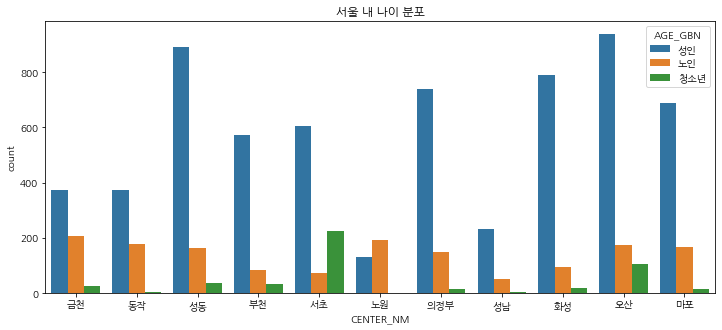

In [89]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'CENTER_NM', hue = 'AGE_GBN', data = seoul_on).set_title('서울 내 나이 분포')

In [91]:
seoul_on['CENTER_NM'].value_counts()

오산     1217
성동     1091
서초      904
의정부     902
화성      901
마포      869
부천      687
금천      603
동작      553
노원      323
성남      287
Name: CENTER_NM, dtype: int64

Text(0.5, 1.0, '서울 내 나이 분포')

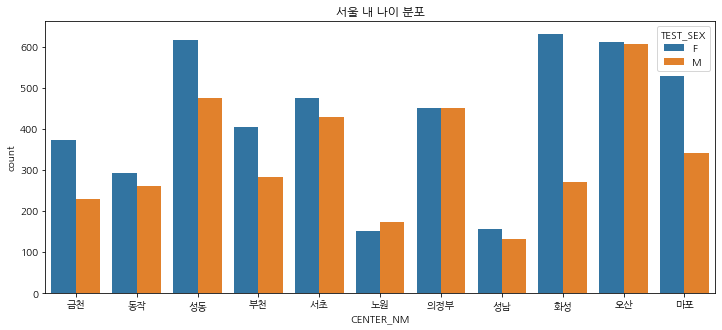

In [90]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'CENTER_NM', hue = 'TEST_SEX', data = seoul_on).set_title('서울 내 나이 분포')

# 코로나 -202008 측정보기

In [61]:
df = pd.read_csv('data/코로나_체력측정_202008.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TEST_CNT   9330 non-null   int64 
 1   CENTER_NM  9330 non-null   object
 2   AGE_GBN    9330 non-null   object
 3   TEST_GBN   9330 non-null   object
 4   TEST_AGE   9330 non-null   int64 
 5   INPUT_GBN  8722 non-null   object
 6   CERT_GBN   9330 non-null   object
 7   TEST_YMD   9330 non-null   int64 
 8   TEST_SEX   9330 non-null   object
dtypes: int64(3), object(6)
memory usage: 656.1+ KB


In [62]:
age_classification(df)

청소년 수는 2836 입니다
20대 수는 1911 입니다
30대 수는 1381 입니다
40대 수는 1072 입니다
50대 수는 748 입니다
60대 이상(노인) 수는 563 입니다


,number
Teenager,2836
20s,1911
30s,1381
40s,1072
50s,748
old,563


In [64]:
age_classification(fit_9)

청소년 수는 8192 입니다
20대 수는 8580 입니다
30대 수는 1339 입니다
40대 수는 1293 입니다
50대 수는 1723 입니다
60대 이상(노인) 수는 6019 입니다


,number
Teenager,8192
20s,8580
30s,1339
40s,1293
50s,1723
old,6019


In [66]:
print(len(df[(df['TEST_AGE'] >= 20) & (df['TEST_AGE'] <=27)] ))
print(len(df[(df['TEST_AGE'] >= 28) & (df['TEST_AGE'] <30)] ))

1551
360


In [67]:
army = df[(df['TEST_AGE'] >= 20) & (df['TEST_AGE'] <=27)] 
army['TEST_AGE'].value_counts()

20    585
21    177
27    166
25    161
26    160
24    110
22    105
23     87
Name: TEST_AGE, dtype: int64

In [69]:
len(df[df['TEST_GBN']=='출장']) / len(df['TEST_GBN'])

0.6027867095391212

In [70]:
len(df[df['TEST_GBN']=='출장']) 

5624

In [71]:
len(df[df['TEST_GBN']=='일반']) 

3706